In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyksc import ksc

In [2]:
FILENAME='/home/wagnernegrao/Downloads/dataset.csv'

In [3]:
# load dataset
df = pd.read_csv(FILENAME, usecols=['Date', 'Project', 
                                    'code', 'filename', 'language'])



In [4]:
# removes dirt from the Date column 
df['Date'] = df.Date.apply(lambda date: date.replace('.csv', ''))

In [5]:
# convert column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# sort column
df = df.sort_values(by='Date')

In [6]:
# filter only the languages that are being used
df = df.loc[(df['language']  == 'C') |
              (df['language'] == 'C++') |
              (df['language'] == 'C#') |
              (df['language'] == 'Clojure') |
              (df['language'] == 'CoffeeScript') |
              (df['language'] == 'Go') |
              (df['language'] == 'Haskell') |
              (df['language'] == 'Java') |
              (df['language'] == 'JavaScript') |
              (df['language'] == 'Kotlin') |
              (df['language'] == 'Lua') |
              (df['language'] == 'Objective C') |
              (df['language'] == 'PHP') |
              (df['language'] == 'Python') |
              (df['language'] == 'Ruby') |
              (df['language'] == 'Rust') |
              (df['language'] == 'Scala') |
              (df['language'] == 'Swift') |
              (df['language'] == 'TypeScript') |
              (df['language'] == 'Elixir')]

In [7]:
def file_unique(dfx):
    """
    Cria uma lista com arquivos unicos e remove os arquivos repetidos
    
    Parameters:
    ----------
    object dfx: recebe um dataset
    
    Return:
    -------
    list files: lista com os arquivos unicos
    """
    
    files_list = dfx.filename.tolist()

    files = []

    for i in files_list:
        if(i not in files):
            files.append(i)
    
    return(files)

In [8]:
# Filtra o dataframe para apenas arquivos acima do limiar
dfx = df.loc[df['code'] >= 13196]


unique_files = file_unique(dfx)

In [9]:
print("Quantidade de arquivos unicos: ", len(unique_files))

('Quantidade de arquivos unicos: ', 502)


In [10]:
def create_dataframe(df, unique_files):
    '''
    Cria um dataframe para cada arquivo unico e adiciona numa lista. 
    
    Parameters:
    -----------
    object df: Dataset
    list unique_files: Lista com os arquivos unicos
    
    Return:
    -------
    list dfs: Uma lista com varios dataframes
    '''
    
    dfs = []
    
    for path in unique_files:
         dfs.append(df.loc[df['filename'] == path])
    
    return(dfs)

In [11]:
# Torna float a coluna code
dfx['code'] = dfx.code.apply(lambda code: float(code))

/home/wagnernegrao/Virtualizations/largeFiles_py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
dfs = create_dataframe(dfx, unique_files)

In [13]:
"""
d = {'Date': frame.Date.tolist(), 'Code': frame.code.tolist()}
d['Code'].insert(0,0)
d['Date'].insert(0,d['Date'][0])

dfx2 = pd.DataFrame(data=d)

dfx2['Code'] = dfx2.Code.apply(lambda code: float(code))
"""

"\nd = {'Date': frame.Date.tolist(), 'Code': frame.code.tolist()}\nd['Code'].insert(0,0)\nd['Date'].insert(0,d['Date'][0])\n\ndfx2 = pd.DataFrame(data=d)\n\ndfx2['Code'] = dfx2.Code.apply(lambda code: float(code))\n"

In [14]:
def create_series(dfs):
    '''
    Percorre cada dataframe da lista e adiciona o LOC
    e os anos de cada um em uma lista.
    
    Parameters:
    -----------
    object dfs: Lista com dataframes
    
    Return:
    -------
    list tm_series: Lista com o LOC de cada arquivo
    list years: Lista com os anos de cada arquivo
    '''
    
    time_series = [] 
    years = [] 
    
    for df in dfs:
        time_series.append(df.code.tolist())
        years.append(df.Date.dt.year.tolist())
        
    return(time_series, years)


loc_list, years = create_series(dfs)

In [16]:
import statistics as stacs

# Cria a media e a mediana

value_sum = 0
value_list = []

for i in loc_list:
    value_sum+=len(i)
    value_list.append(len(i))
    
value_list = sorted(value_list)

min_value = value_sum/len(loc_list)

print("Media de LOC:", value_sum/len(loc_list))
print("Mediana de LOC:", stacs.median(value_list))

('Media de LOC:', 31)
('Mediana de LOC:', 9.0)


In [17]:
# Usado para deixar as listas com o mesmo tamanho 

def size_series(loc_list, min_value):
    
    """
    Verifica as listas que possuem o tamanho menor que o valor minimo
    e remove, apos isso deixa todas as listas com o mesmo tamanho
    
    Parameters:
    -----------
    list loc_list: Lista com todos os LOC dos arquivos
    int min_value: Valor minimo para tamanho das listas
    
    Return:
    -------
    list loc_list: Nova lista de LOC
    int min_value: Novo valor minimo
    
    """
    
    flag = False

    while(flag != True):
        
        for i in range(len(loc_list)):
            
            if(len(loc_list[i]) < min_value):
                loc_list.pop(i)
                break

            for j in range(len(loc_list[i])):
                if(j >= min_value):
                    loc_list[i].pop(j)
                    
                    break
                    
        for serie in loc_list:
            if(len(serie) == min_value):
                flag = True
            else:
                flag = False
                break
        
    # para todas séries iniciarem em zero, como sendo a criacao do arquivo
    for serie in loc_list:
        serie.insert(0,0)
        
    return(loc_list, min_value+1)

In [18]:
new_loc_list, new_min_value = size_series(loc_list, min_value)

In [19]:
def create_year_serie(min_value, years):
    """
    Cria uma lista com a quantidade de anos, apos isso adiciona
    novamente cada ano ate a lista ter o tamanho necessario
    
    Parameters:
    -----------
    int min_value: Valor minimo para tamanho da lista
    list years: Lista de anos de cada arquivo
    
    Return:
    -------
    list new_year: Lista de anos conforme o min value
    
    """
    
    new_year = [] 

    for year in years:
        for i in year:
            if i not in new_year:
                new_year.append(i)

    cont = 0 
    while(len(new_year) < min_value):
        new_year.append(new_year[cont])
        cont+=1

    new_year = sorted(new_year)
    
    return(new_year)

In [20]:
'''
Para o o google sheets entenda a entrada dos dados 
a lista de centroids deve ter uma quantidade menor de casas e estar ordenada
'''

'''
centro = [[],[]]

for i in range(len(centroids)):
    for j in range(len(centroids[i])):
        centro[i].append(round(centroids[i][j], 3))

'''     

'\ncentro = [[],[]]\n\nfor i in range(len(centroids)):\n    for j in range(len(centroids[i])):\n        centro[i].append(round(centroids[i][j], 3))\n\n'

In [28]:
centroids

array([[-0.        ,  0.17887303,  0.17894298,  0.17956572,  0.17959681,
         0.17916319,  0.17980204,  0.17937742,  0.18038866,  0.18043375,
         0.17884093,  0.17891654,  0.17896633,  0.1790977 ,  0.17924714,
         0.17938304,  0.17937329,  0.17955101,  0.1795993 ,  0.17926017,
         0.17916026,  0.17960737,  0.17972075,  0.17958891,  0.17967453,
         0.17972721,  0.17975726,  0.17977248,  0.1798704 ,  0.18019275,
         0.18117548,  0.18110988],
       [-0.        ,  0.14773525,  0.14991032,  0.15571865,  0.15667001,
         0.15755634,  0.15945685,  0.16118514,  0.16284797,  0.16535323,
         0.16678599,  0.17068844,  0.16683685,  0.17154939,  0.17446448,
         0.17492343,  0.17590783,  0.17847468,  0.17998632,  0.18172919,
         0.18700948,  0.19002357,  0.19191491,  0.19353414,  0.19621294,
         0.19764077,  0.19785427,  0.20168413,  0.20266844,  0.20321783,
         0.20826383,  0.21177247],
       [-0.        ,  0.10329879,  0.10792214,  0.1109

In [24]:
# para gerar esses plots deve ser em float o loc
tm_series = np.array(new_loc_list) #Cria uma matriz com os valores de LOC

clusters_by_time_series = {}

centroids, assign, best_shift, cent_dists = ksc.ksc(tm_series, 3) # inicia o algoritmo com 3 clusters


In [25]:
if assign is not None:
    for series, cluster in zip(tm_series, assign):
        if cluster in clusters_by_time_series.keys():
            clusters_by_time_series[cluster].append(series)
        else:
            clusters_by_time_series[cluster] = [series]

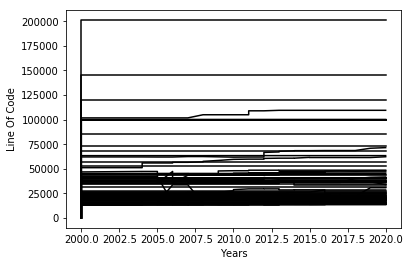

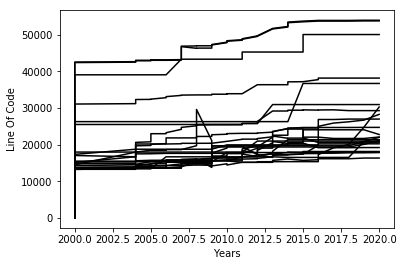

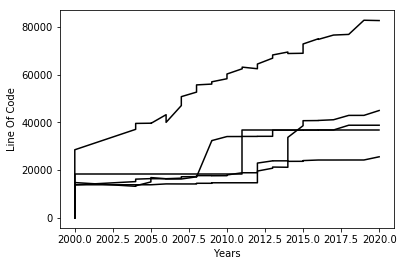

In [29]:
weeks = None 

for cluster in clusters_by_time_series.keys():
    figure = plt.figure()

    for project_time_series in clusters_by_time_series[cluster]:
        if weeks is None:
            weeks = [-i for i in range(len(project_time_series) - 1, -1, -1)]

        project_time_series = [0 if i == 0.1 else int(i) for i in project_time_series]
        
        years_d = create_year_serie(len(project_time_series), years)
        
        plt.xlabel('Years')
        plt.ylabel('Line Of Code')
        plt.plot(years_d, project_time_series, color='black')
        
        figure.savefig('curva_crescimento.png', bbox_inches='tight', format='png', dpi=1000)

In [42]:
# quantidade de arquivos por cluster
for i in range(3):
    print("Cluster ", i+1, " possuir ", len(clusters_by_time_series[i]), ' arquivos')

('Cluster ', 1, ' possuir ', 101, ' arquivos')
('Cluster ', 2, ' possuir ', 25, ' arquivos')
('Cluster ', 3, ' possuir ', 5, ' arquivos')


In [ ]:

for cluster, centroid in zip(range(0, 3), centroids):
    growth_rate = centroid[0] + centroid[-1] * 100
    #report_file.write(str(cluster) + ': ' + str(centroid) + ' (Growth:' + str("{0:.2f}".format(growth_rate)) + ')\n')

    if weeks is None:
        weeks = [-i for i in range(len(centroid) - 1, -1, -1)]

    figure = plt.figure()
    plt.xlabel('Years')
    plt.ylabel('Average')
    plt.plot(years_d, centroid, color='black')
